In [85]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random

# A Discrete Convolution Program (5 pts)

Write a discrete convolution function `myConv` that convolves two arrays {$f_i, i = 0, \dots , N_f-1$}
and {$w_j, j = 0, \dots , N_w-1$} to obtain an output time series {$g_n$}. For simplicity, assume a fixed sampling interval $\Delta = 1$, and further, that $f$ and $w$ are $0$ outside of their sampled regions. 

 1. How long is {$g_n$}? In other words, how many non-zero points can it have? Justify your answer. 
 2. Please copy and paste your function `g = myConv(f, w)` to the PDF report.
 3. Provide a test to convince yourself (and me) that your function agrees with `numpy.convolve`. For example, generate two random timeseries $f$, $w$ with $N_f=75$, $N_w=150$, drawing each element from $U[0,1]$, and plot the difference between your function's output and numpy's. Include the code for your test in the PDF report.
 4. Compare the speed of your `myConv` function to the NumPy function. Provide a plot of the comparison, and include your python code in the PDF report. Is your function faster or slower than the NumPy function? Can you suggest why that is the case?

_Hint_: For the speed test part, make up your own $f_i$ and $w_j$ time series, and for simplicity, study the cases
of $N_f = N_w = 10, 100, 1000, 10000$. To accurately time each computation of the convolution function, import the
time module and place calls to `time.time` around your code:
```
import time
t1 = time.time()
g = myConv(f, w)
t2 = time.time()
print(t2-t1)
```
Alternatively, use the `timeit` module:
```
import timeit
print(timeit.timeit('g = myConv(f, w)', number=10000))
```

collaborators: None

1. Nf+Nw-1. This is because when we flip w and start our iteration, we have the last value of w overlapping with the first value of f. We then keep shifting w and performing the calculation until all the values overlap. Once the last value of w aligns with the last value of f, our output sequence is the length of f but we don't stop there. We keep shifting w until its first value aligns with f's last value, making the length of this the length of w - 1 because this step makes all values of w except one align with f. Therefore the length of g is Nf+Nw-1.

In [86]:
##part 2
def myConv(f,w):
    Nf = len(f) #define lengths of the 2 input arrays f and w
    Nw = len(w)
    #delta is 1 so we ignore it here
    n = Nf+Nw-1 #size/length of output array g

    g = np.zeros(n) #list of 0's (will be our output time series)
    
    if Nw > Nf: #need to swap arrays if w is longer than f
        f,w = w,f
        

    for i in range(n):
        if i > min(Nf,Nw): #to avoid out of range errors
            g[i]=0 #because this is outside of w's (or f if Nf<Nw) sampled region
        for s in range(max(Nf,Nw)): 
            if i-s < min(Nf,Nw) and i-s >=0: #since we're taking w's position at i-s, i-s must be less than the length of w
                #i-s must also be greater than 0 so we dont use the same value twice
                g[i] += f[s]*w[i-s] #convolution calculation
    
    return g           

Text(0, 0.5, 'difference')

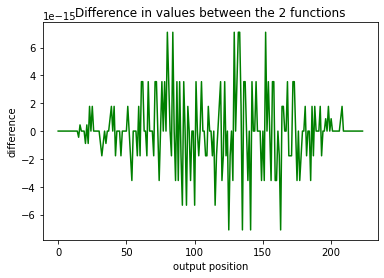

In [135]:
##part 3
np.random.seed(2)
f = np.random.random(75)
w = np.random.random(150)

diff = myConv(f,w) - np.convolve(f,w)
plt.plot(diff, 'green')
plt.title('Difference in values between the 2 functions')
plt.xlabel('output position')
plt.ylabel('difference')

Text(0, 0.5, 'my convolve function')

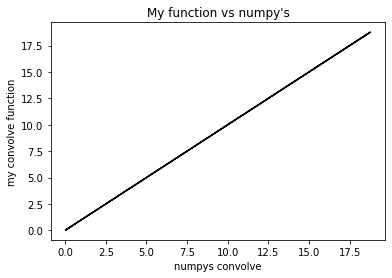

In [88]:
plt.plot(np.convolve(f,w),myConv(f,w), 'black')
plt.title('My function vs numpy\'s')
plt.xlabel('numpys convolve')
plt.ylabel('my convolve function')

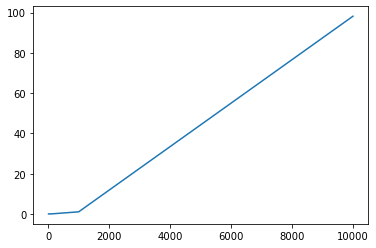

In [90]:
##part 4
import time
np.random.seed(55) #so we get the same values every time we run this chunk
n = [10,100,1000,10000]
mytime = [] #setting arrays to append the time my/np's function takes to run
nptime = [] 
for t in n:
    f = np.random.random(t)
    w = np.random.random(t) #generating random numbers
    
    t1 = time.time() #time starts
    g = myConv(f, w)
    t2 = time.time() #time stops
    diff = t2-t1
    mytime.append(diff) #adding the time it took to find g for different values of n
    
for t in n:
    f = np.random.random(t)
    w = np.random.random(t)
    
    t1 = time.time()
    g = np.convolve(f, w)
    t2 = time.time()
    diff = t2-t1
    nptime.append(diff)


My function is slower than numpys. This may be due to having to go through the for loop for each iteration which as n increases, the more loops there are to do, the more time it takes.

Text(0.5, 1.0, 'Difference in time')

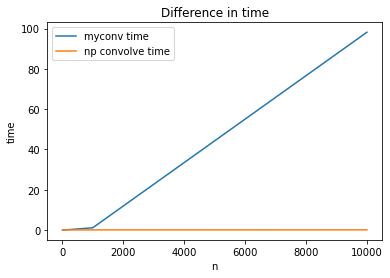

In [91]:
plt.plot(n,mytime, label = 'myconv time')
plt.plot(n,nptime, label = 'np convolve time')
plt.legend()
plt.ylabel('time')
plt.xlabel('n')
plt.title('Difference in time')

# Simple Physical System: RL Circuit Response (7 pts)

Consider a simple physical system consisting of a resistor (with resistance `R`) and an inductor (with inductance `L`) in series.  We apply an input voltage $a(t)$ across the pair in series, and measure the output
voltage $b(t)$ across the inductor alone. For this linear system,

 1. Show analytically that its step response (i.e., the $b(t)$ we obtain when the input voltage $a(t) = H(t)$,
    the Heaviside function) is given by

    $$ S(t) = e^{-Rt/L} H(t), $$

    and its impulse response (i.e., the output voltage $b(t)$ when $a(t) = \delta(t)$) is given by

    $$ R(t) = \delta(t) - \frac{R}{L} e^{-Rt/L} H(t). $$

    _Hint_: Construct and solve the ODE relating the voltages under consideration. Consider the two $b(t)$ choices to derive $S(t)$ and $R(t)$. Formulas $\frac{d}{dt} H(t) = \delta(t)$ and $\delta(t) f(t) = \delta(t) f(0)$ may help.
 2. Discretize the impulse response $R(t)$ function, realizing that $H(t)$ should be discretized as

    $$H = [0.5, 1, 1, \dots],$$

    and $\delta(t)$ should be discretized as

    $$D = [1/dt, 0, 0, \dots].$$

    Take advantage of your `myConv` function, or the NumPy built-in function `convolve`, and write
    your own Python function `V_out = RLresponse(R,L,V_in,dt)` to take an input series $V_{in}$ sampled
    at $\Delta = dt$, and calculate the output series $V_{out}$ sampled by the same $dt$. Please paste your
    Python function here (if you are not using a jupyter notebook). (Hint: here $\Delta$ may not be 1, so remember to build the multiplication of
    $\Delta$ into your convolution function.)
 3. Using $R = 1000 \Omega$, $L = 3 H$, and sampling period $dt = 0.25 \text{ ms}$, test your RL-response
    function with {$H_n$} series (discretized $H(t)$) as input, and plot the output time series (as circles) on
    top of the theoretical curve $S(t)$ given by part 1 (as a solid line). Repeat this for {$D_n$} (discretized
    $\delta(t)$) and $R(t)$. Make the time range of the plots 0 to at least 25 ms. Please list your Python
    code here (if you are not using a jupyter notebook).

collaborators: none

For part 1 I submitted a different file!! (I handwrote the derivation)

In [133]:
## part 2
def H(t):
    H = np.ones(t) #a list of 1's the length of t
    H[0] = 0.5 #making the first value 0.5
    return H
def D(t,dt):
    D = np.zeros(t) #list of 0's the length of t
    D[0] = 1/dt #discretizing D by making the first value 1/dt
    return D
def RLresponse(R,L,V_in,dt):
    t = np.arange(0,len(V_in)*dt,dt)
    n = len(V_in)
    R_t = D(n,dt) - (R/L)*np.exp(-R*t/L)*H(n) #formula of R(t) given in question
    V_out = np.convolve(V_in,R_t)*dt #we multiply by dt because it may not be 1 as stated in the hint
    return V_out


Text(0.5, 1.0, 'Theoretical R vs Convoluted impulse')

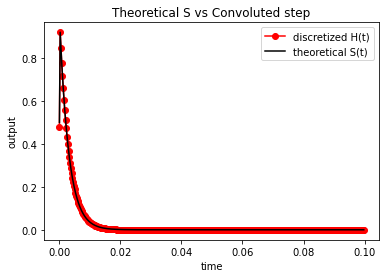

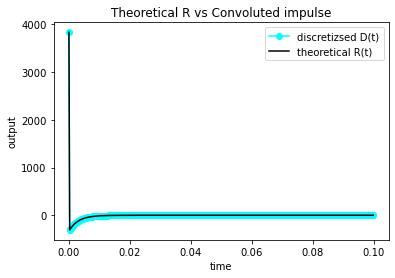

In [134]:
## part 3
R = 1000 #ohms
L = 3
dt = 0.00025 #changed ms to s

time = np.arange(0,0.1,dt)
t = len(time)
V_in_1 = H(t)

V1_out = RLresponse(R,L,V_in_1,dt)

V_in_2 = D(t,dt)
V2_out = RLresponse(R,L,V_in_2,dt)

S = np.exp(-R*time/L)*H(t)
Rt = D(t,dt) - (R/L)*S

plt.figure()
plt.plot(time,V1_out[:t],marker ='o', color='red', label = 'discretized H(t)')
plt.plot(time,S,color= 'black', label = 'theoretical S(t)')
plt.legend()
plt.title('Theoretical S vs Convoluted step')
plt.xlabel('time')
plt.ylabel('output')


plt.figure()
plt.plot(time,V2_out[:t], marker='o', color= 'aqua', label = 'discretizsed D(t)')
plt.plot(time,Rt, color = 'black', label = 'theoretical R(t)')
plt.xlabel('time')
plt.ylabel('output')
plt.legend()
plt.title('Theoretical R vs Convoluted impulse')

# Convolution of a thermal infrared Spectrum (8 pts)

The Tropospheric Emission Spectrometer (TES) is a Fourier transform spectrometer that was launched by NASA on the Aura spacecraft in July 2004. The instrument measures radiation from the atmosphere in the thermal infrared region of the spectrum. The file `TES_spectra.txt` contains TES measurements on 10 July 2010 from the 2B1 filter on TES. In this spectral region, vertical profiles of atmopsheric temprature and water vapour can be retrieved. (The file contains the spectrum as a function of wavenumbers $\tilde{\nu} = 1/\lambda$ in units of cm$^{-1}$). One way of simulating the spectrum that might be measured by a low-resolution version of TES is by convolving the TES high-resolution spectrum with the function $2\Delta\sin(2\pi \tilde{\nu}\Delta)/(2\pi \tilde{\nu}\Delta)$, where $\Delta$ is a measure of the spectral resolution.

1. Plot the TES spectrum as a function of wavenumber. 
2. Plot the function $2\Delta\sin(2\pi \tilde{\nu}\Delta)/(2\pi \tilde{\nu}\Delta)$ over the interval $\tilde{\nu}=[-3,3]$, with $\Delta \tilde{\nu} = 0.06$ cm$^{-1}$, for values of $\Delta = 1$ and $\Delta =3$.
3.	Use numpy's convolve function to convolve the high-resolution spectrum in the file `TES_Spectra.txt` separately with the two curves in Part 2 (i.e., for $\Delta = 1$ and $\Delta = 3$).
4.	For each of the two cases, plot the original and convolved time series over the wavenumber range $[700,750]$. Comment on the differences in the convolved time series between the two cases.
5. Consider convolving the spectrum with the following Gaussian: $g(\tilde{\nu}) = \frac{1}{\sqrt{\pi}L} e^{-(\tilde{\nu}/L)^2}.$

   Plot The Guassian for $L=0.5$ (over the interval $\tilde{\nu}=[-3,3]$) and the timeseries of the convolution of the TES spectrum with the Gaussian (over the range [700,750]). Comment on the differences between the this convolved time series and those from Part 4.

__Note__

* The spectrum in  `TES_Spectra.txt` is given as a text file with two columns: the first column contains the wavenumber of the measurement (in units of cm$^{-1}$) and the second column has the spectral signal (in Watts cm$^{-2}$ sr$^{-1}$/cm$^{-1}$).
* Use `mode='same'` when calling numpy convolve to truncate the convolution to the max of the supplied arrays (i.e. length of the high-resolution timeseries in our case). This is convenient, since we want to compare the convolution output to the original timeseries.  
* As a check for Parts 4 and 5, ensure that your convolved timeseries is aligned with (or "overlaps") the original timeseries.

collaborators: none

Text(0, 0.5, 'TES spectrum')

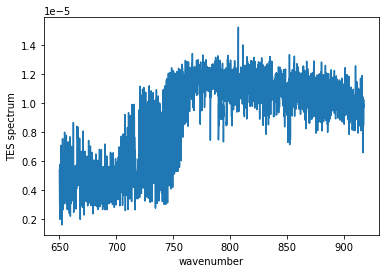

In [34]:
##part 1
wn, TES = np.loadtxt('TES_Spectra.txt', unpack = True)
plt.figure()
plt.plot(wn,TES)
plt.xlabel('wavenumber')
plt.ylabel('TES spectrum')

Text(0, 0.5, 'sin function')

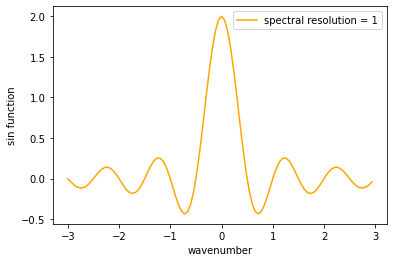

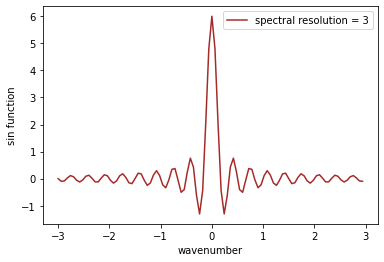

In [38]:
## part 2
d1=1
d3=3
v = np.arange(-3,3,0.06)
curve1 = 2*d1*np.sin(np.pi*2*v*d1)/(2*np.pi*v*d1)
curve2 = 2*d3*np.sin(np.pi*2*v*d3)/(2*np.pi*v*d3)

plt.figure()
plt.plot(v,curve1, label = 'spectral resolution = 1', color = 'orange')
plt.legend()
plt.xlabel('wavenumber')
plt.ylabel('sin function')

plt.figure()
plt.plot(v,curve2, label = 'spectral resolution = 3', color = 'brown')
plt.legend()
plt.xlabel('wavenumber')
plt.ylabel('sin function')

In [64]:
##part 3
dv = 0.06
tesconv1 = np.convolve(TES,curve1, mode = 'same')*dv
tesconv2 = np.convolve(TES,curve2, mode = 'same')*dv

Text(0.5, 1.0, 'Spectral resolution = 3')

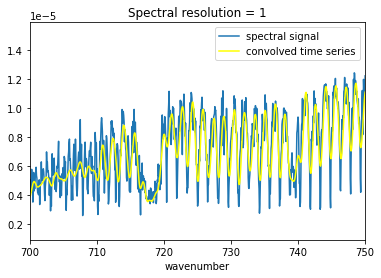

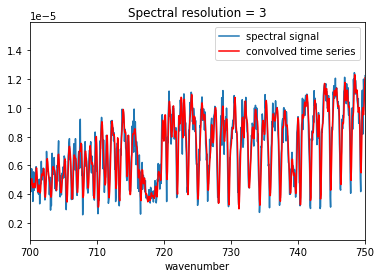

In [79]:
##part 4
plt.figure()
plt.plot(wn,TES, label = 'spectral signal')
plt.xlabel('wavenumber')
plt.plot(wn,tesconv1, color = 'yellow', label = 'convolved time series')
plt.xlim(700,750)
plt.legend()
plt.title('Spectral resolution = 1')

plt.figure()
plt.plot(wn,TES, label = 'spectral signal')
plt.xlabel('wavenumber')
plt.plot(wn,tesconv2,color = 'red', label = 'convolved time series')
plt.xlim(700,750)
plt.legend()
plt.title('Spectral resolution = 3')

The two convolved time series fit the original fairly well, however, by looking at the graphs above we can tell that when the spectral resolution is 3, the fit is much better than when the spectral resolution is 1. It is more accurate and the peaks all align to the (roughly) same amplitude (red line). The first plot starts off not very accurate but quickly aligns more and more the larger the wavenumber gets. In the second one, we can see that the convoluted series aligns better and for the entire series shown. 

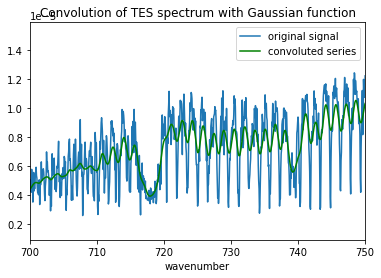

In [76]:
## part 5
L=0.5
gauss = 1/(L*np.sqrt(np.pi))*np.exp(-(v/L)**2)
tesconv3 = np.convolve(TES,gauss, mode = 'same')*dv

plt.figure()
plt.plot(wn,TES, label = 'original signal')
plt.plot(wn,tesconv3, 'green', label = 'convoluted series')
plt.xlim(700,750)
plt.xlabel('wavenumber')
plt.title('Convolution of TES spectrum with Gaussian function')
plt.legend()

The main difference between this convolved time series and the ones in part 4 is that this one fits the original TES data the worst. The graph somewhat has the same shape, however it is not as amplified as the other two in part 4. We can see the green line doesn't cover half of the peaks in the original data (blue).